In [6]:
from langgraph.graph import Graph,MessagesState,StateGraph,END,START
from langchain_core.messages import HumanMessage,SystemMessage
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
# from langchain_core.tools import DuckDuckGoSearchRun
from IPython.display import Image,display
from typing import TypedDict,Annotated
import operator
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from langchain_community.tools import DuckDuckGoSearchRun
from ctransformers import AutoModelForCausalLM

c:\Users\Admin\LLM\Agentic AI\react_agent\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# llm = AutoModelForCausalLM.from_pretrained(
#     model_path_or_repo_id="model\mistral-7b-instruct-v0.1.Q4_K_M.gguf",
#     model_file ="mistral-7b-instruct-v0.1.Q4_K_M.gguf",
#     model_type = "mistral",
#     context_length = 4096 ,
#     local_files_only= True
# )
# response = llm("What is the use of transformers in NLP?")
# print(response)


Transformers are a type of neural network architecture that has shown significant success in natural language processing (NLP) tasks. They work by encoding the input text into a sequence of vectors, which can then be manipulated using attention mechanisms to extract relevant information from different parts of the text. Transformers can be used for a wide range of NLP tasks, including text classification, machine translation, named entity recognition, sentiment analysis, and more. They are particularly effective at handling long sequences of text and can process large amounts of data efficiently.


In [ ]:
from langchain_groq import ChatGroq
import os
from dotenv import load_dotenv

load_dotenv()

groq_api_key = os.getenv(groq_api_key)

llm = ChatGroq(model_name = "gemma2-9b-it",api_key = groq_api_key)

In [12]:
def multiply(a: int, b: int) -> int:
    """ 
    Multiply a and b.
    Args :
        a: first int
        b: second int

    """
    return a * b

In [13]:
def add(a: int, b: int)-> int:
    """ 
    Add a and b.
    Args :
        a: first int
        b: second int

    """
    return a + b

In [14]:
def divide(a: int, b: int) -> int:
    """ 
    Divide a and b.
    Args :
        a: first int
        b: second int

    """
    return a / b

In [29]:
# from langchain_community.tools import DuckDuckGoSearchRun
from duckduckgo_search import DDGS

search = DDGS()

# search.news("capital of India")
# search.news("who is USA president?")


In [16]:
tools = [add, multiply,divide]

In [17]:
from langchain_core.tools import tool

llm_with_tools = llm.bind_tools(tools)

In [18]:
sys_msg = SystemMessage(content ="You are a helpful assistant tasked with using search and performing arithmatic operations on set of inputs")

In [19]:
def reasoner(state:MessagesState):
    return {"messages":[llm_with_tools.invoke([sys_msg]+state["messages"])]}

In [20]:
builder = StateGraph(MessagesState)

builder.add_node("reasoner",reasoner)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START,"reasoner")

builder.add_conditional_edges(
    "reasoner",
    tools_condition
)

builder.add_edge("tools","reasoner")
react_graph = builder.compile()

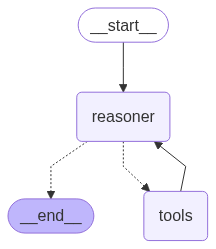

In [21]:
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
messages = [HumanMessage(content ="What is the height of the Elon musk and total height of the Mount everest in meters ?")]

In [34]:
messages = react_graph.invoke({"messages":messages})

In [35]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the height of the Elon musk and total height of the Mount everest ?
================================== Ai Message ==================================
Tool Calls:
  add (call_e3b1)
 Call ID: call_e3b1
  Args:
    a: 510
    b: 8848
================================= Tool Message =================================
Name: add

9358
================================== Ai Message ==================================

The total height is 9358
